# 1. Introduction: Business Goal & Problem Definition

The goal of this project is to study and predict the right group of new customers for an automotive company, so the company can adopt the specific proven marketing strategy to each of them and be more succesful in the business. For that we´ll use the Customer Segmentation Classification Dataset available in Kaggle, containing 10,695 observations, each with the following attributes:

IF YOU LIKE IT OR IF IT HELPS YOU SOMEHOW, COULD YOU PLEASE UPVOTE? THANK YOU VERY MUCH!!!

* ID	Unique ID
* Gender	Gender of the customer
* Ever_Married	Marital status of the customer
* Age	Age of the customer
* Graduated	Is the customer a graduate?
* Profession	Profession of the customer
* Work_Experience	Work Experience in years
* Spending_Score	Spending score of the customer
* Family_Size	Number of family members for the customer (including the customer)
* Var_1	Anonymised Category for the customer
* Segmentation	(target) Customer Segment of the customer

# 2. Importing Basic Libraries

In [1]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Collection

In [2]:
auto_train_ds = pd.read_csv("../input/customer-segmentation/Train.csv", sep=",")
auto_test_ds = pd.read_csv("../input/customer-segmentation/Test.csv", sep=",")
auto_ds = pd.concat([auto_train_ds, auto_test_ds])

auto_ds

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


# 4. Data Preliminary Exploration

In [3]:
#Checking a dataset sample

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.options.display.float_format="{:,.2f}".format
auto_ds.sample(n=10, random_state=0)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5475,460394,Female,No,32,Yes,Healthcare,9.00,Low,3.00,Cat_6,D
1167,461798,Female,No,56,Yes,Artist,0.00,Low,1.00,Cat_6,A
3156,464976,Male,Yes,75,No,Lawyer,1.00,Low,1.00,Cat_4,D
124,462104,Male,Yes,39,No,Entertainment,9.00,Low,2.00,Cat_3,D
1158,464829,Male,No,22,No,Healthcare,9.00,Low,5.00,Cat_4,D
1509,464634,Female,No,32,Yes,Engineer,nan,Low,9.00,Cat_4,D
3380,467670,Male,No,25,No,Engineer,nan,Low,3.00,Cat_6,A
1495,462073,Female,No,36,Yes,Artist,6.00,Low,1.00,Cat_6,C
7372,463611,Male,No,62,Yes,Artist,0.00,Low,nan,Cat_6,A
5476,460962,Male,Yes,55,Yes,Executive,9.00,High,4.00,Cat_6,C


In [4]:
#Checking dataset info by feature

auto_ds.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [5]:
#Checking the existence of zeros in rows

(auto_ds==0).sum(axis=0).to_excel("zeros_per_feature.xlsx")
(auto_ds==0).sum(axis=0)

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    3087
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation          0
dtype: int64

In [6]:
#Checking the existence of duplicated rows

auto_ds.duplicated().sum()

38

In [7]:
#Checking data balancing (for classification)

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = auto_ds["Segmentation"].value_counts()
auto_balancing["Count%"] = auto_ds["Segmentation"].value_counts()/auto_ds.shape[0]*100

auto_balancing

,Count,Count%
D,3027,28.30
A,2818,26.35
C,2442,22.83
B,2408,22.52


In [8]:
#Checking basic statistical data by feature

auto_ds.describe(include="all")

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,"10,695.00",10695,10505,"10,695.00",10593,10533,"9,597.00",10695,"10,247.00",10587,10695
unique,nan,2,2,nan,2,9,nan,3,nan,7,4
top,nan,Male,Yes,nan,Yes,Artist,nan,Low,nan,Cat_6,D
freq,nan,5841,6163,nan,6570,3318,nan,6494,nan,6910,3027
mean,"463,468.09",NaN,NaN,43.51,NaN,NaN,2.62,NaN,2.84,NaN,NaN
std,"2,600.97",NaN,NaN,16.77,NaN,NaN,3.39,NaN,1.54,NaN,NaN
min,"458,982.00",NaN,NaN,18.00,NaN,NaN,0.00,NaN,1.00,NaN,NaN
25%,"461,220.50",NaN,NaN,30.00,NaN,NaN,0.00,NaN,2.00,NaN,NaN
50%,"463,451.00",NaN,NaN,41.00,NaN,NaN,1.00,NaN,3.00,NaN,NaN
75%,"465,733.50",NaN,NaN,53.00,NaN,NaN,4.00,NaN,4.00,NaN,NaN


# 5. Data Cleaning

    We´ll perform the following:

    1. Remove duplicated rows (38 in total)


    2. Create a calculated column (Work_Experience_to_Age_Ratio) that could potentialy be a relevant feature to the model (to be tested later)


    3. Treat missing values:
        *   3.1 Ever_Married: consider missing values as No
        *   3.2 Graduated: consider missing values as No
        *   3.3 Profession: delete (it´s not representative the amount of blanks)
        *   3.4 Family_Size: mean
        *   3.5 Var_1: delete (it´s not representative the amount of blanks)
        *   3.6 Work_Experience: estimate based on Age
         
    
    4. Remove column ID as it´s not important to the model
           
        
    5. Convert categorical variables (Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1, Segmentation) to dummies
    
    
    6. Convert all numerical variables (Age, Work_Experience, Family_Size, Work_Experience_to_Age_Ratio) to categorical ranges (to be used in next step when analyzing correlations)
    

    * No outliers found
    * The entire dataset will be taken

In [9]:
#1
auto_ds.drop_duplicates(inplace=True)

#2
auto_ds["Work_Experience_to_Age_Ratio"] = auto_ds["Work_Experience"] / auto_ds["Age"]

#3
auto_ds["Ever_Married"].fillna("No", inplace=True)
auto_ds["Graduated"].fillna("No", inplace=True)
auto_ds.dropna(subset=["Profession"], inplace=True)
auto_ds["Family_Size"].fillna(auto_ds["Family_Size"].mean(), inplace=True)
auto_ds.dropna(subset=["Var_1"], inplace=True)
auto_ds["Work_Experience"].replace(0, np.nan, inplace=True)
auto_ds["Work_Experience"].fillna(auto_ds["Work_Experience"].sum() / auto_ds["Age"].sum() * auto_ds["Age"], inplace=True)
auto_ds["Work_Experience_to_Age_Ratio"].replace(0, np.nan, inplace=True)
auto_ds["Work_Experience_to_Age_Ratio"].fillna(auto_ds["Work_Experience"] / auto_ds["Age"], inplace=True)

#4
auto_ds.drop(["ID"], axis=1, inplace=True)

#5
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Gender"], prefix="Gender")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Ever_Married"], prefix="Ever_Married")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Graduated"], prefix="Graduated")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Profession"], prefix="Profession")], axis=1)
auto_ds["Spending_Score_Level"] = auto_ds["Spending_Score"].apply(lambda x: ["Low", "Average", "High"].index(x))+1 #Label encoding
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Var_1"], prefix="Var_1")], axis=1)
#target variable for the ML model (label encoding)
auto_ds["Segmentation_Level"] = auto_ds["Segmentation"].apply(lambda x: ["A", "B", "C", "D"].index(x))+1 #Label encoding
#target variable for the DL model (one-hot encoding)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Segmentation"], prefix="Segmentation")], axis=1)
Segmentation_encoding_dl = np.asarray(auto_ds[["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"]]) #creating for the DL model the response variable through the concatenation of the created dummy columns, forming an array

#6
auto_ds["Age_Range"] = np.where(auto_ds.Age>=60, "60+", np.where(auto_ds.Age>=50, "50-60", np.where(auto_ds.Age>=40, "40-50", np.where(auto_ds.Age>=30, "30-40", np.where(auto_ds.Age>=18, "18-30", "18-")))))
auto_ds["Work_Experience_Range"] = np.where(auto_ds.Work_Experience>=10, "10+", np.where(auto_ds.Work_Experience>=5, "5-10", "0-5"))
auto_ds["Family_Size_Range"] = np.where(auto_ds.Family_Size>=6, "6+", np.where(auto_ds.Family_Size>=3, "3-6", "0-3"))
auto_ds["Work_Experience_to_Age_Ratio_Range"] = np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.5, "0.5+", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.4, "0.4-0.5", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.3, "0.3-0.4", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.2, "0.2-0.3", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.1, "0.1-0.2", "0+")))))

auto_ds.to_excel("auto_ds_clean.xlsx")

# 6.	Data Exploration

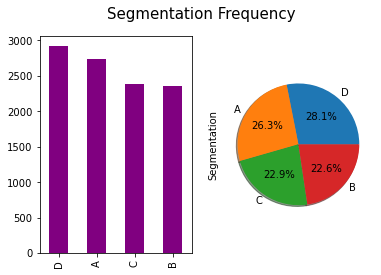

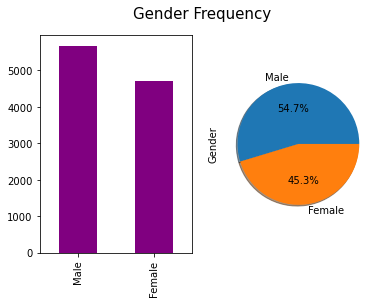

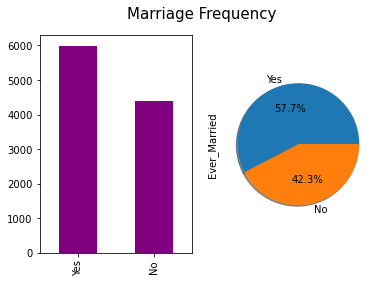

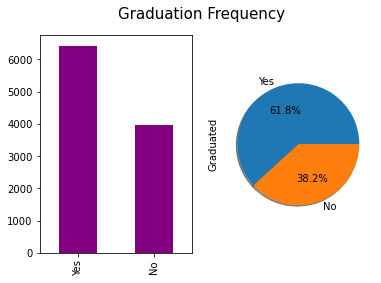

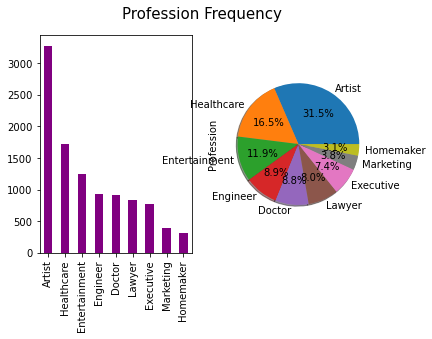

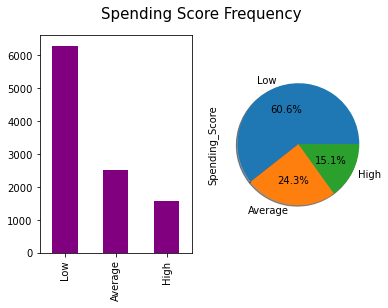

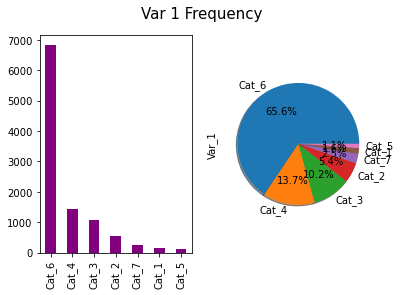

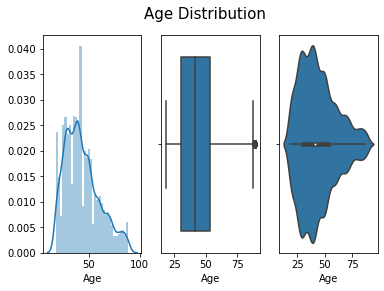

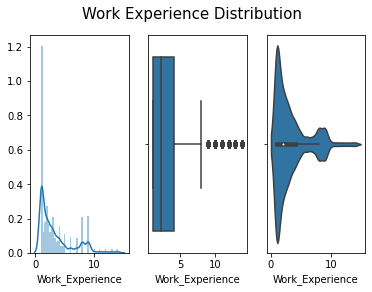

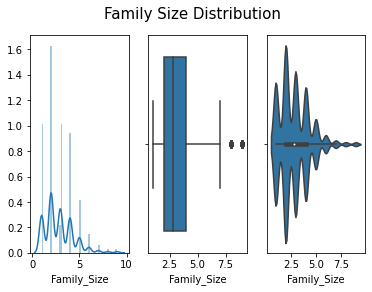

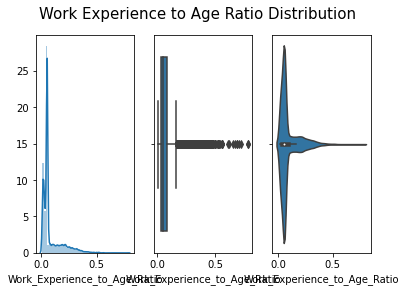

In [10]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
auto_ds["Segmentation"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Segmentation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Gender"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Ever_Married"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Marriage Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Graduated"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Graduation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Profession"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Profession Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Spending_Score"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Spending Score Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Var_1"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Var_1"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Var 1 Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)


#Plotting Numerical Variables

fig, ax = plt.subplots(1,3)
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(auto_ds["Age"], ax=ax[0])
sns.boxplot(auto_ds["Age"], ax=ax[1])
sns.violinplot(auto_ds["Age"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience Distribution", fontsize=15)
sns.distplot(auto_ds["Work_Experience"], ax=ax[0])
sns.boxplot(auto_ds["Work_Experience"], ax=ax[1])
sns.violinplot(auto_ds["Work_Experience"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Family Size Distribution", fontsize=15)
sns.distplot(auto_ds["Family_Size"], ax=ax[0])
sns.boxplot(auto_ds["Family_Size"], ax=ax[1])
sns.violinplot(auto_ds["Family_Size"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience to Age Ratio Distribution", fontsize=15)
sns.distplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[0])
sns.boxplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[1])
sns.violinplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[2])

In [11]:
#Alternatively using Profile Report to see variables statistics and correlations

# from pandas_profiling import ProfileReport
# profile = ProfileReport(auto_ds, title="Automobile Customer Segmentation Classification")
# profile.to_file(output_file="Automobile_Customer_Segmentation_Classification.html")

# 7. Correlations Analysis & Features Selection

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 <a list of 32 Text major ticklabel objects>)

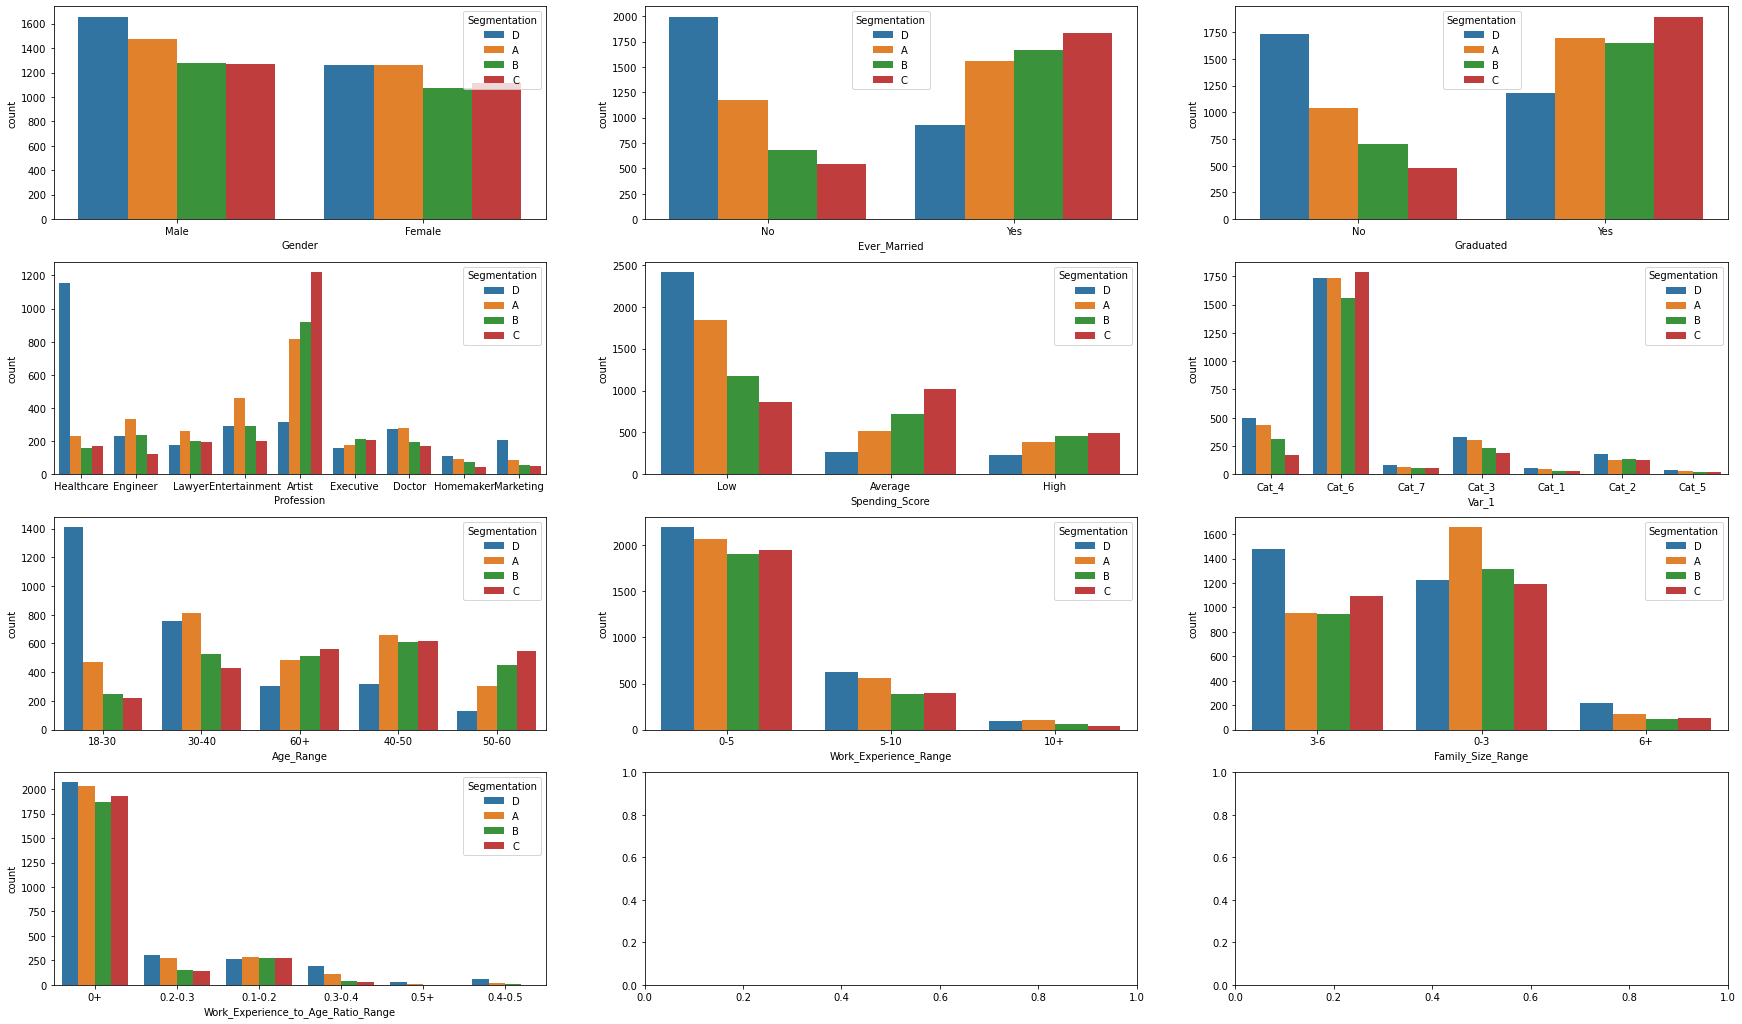

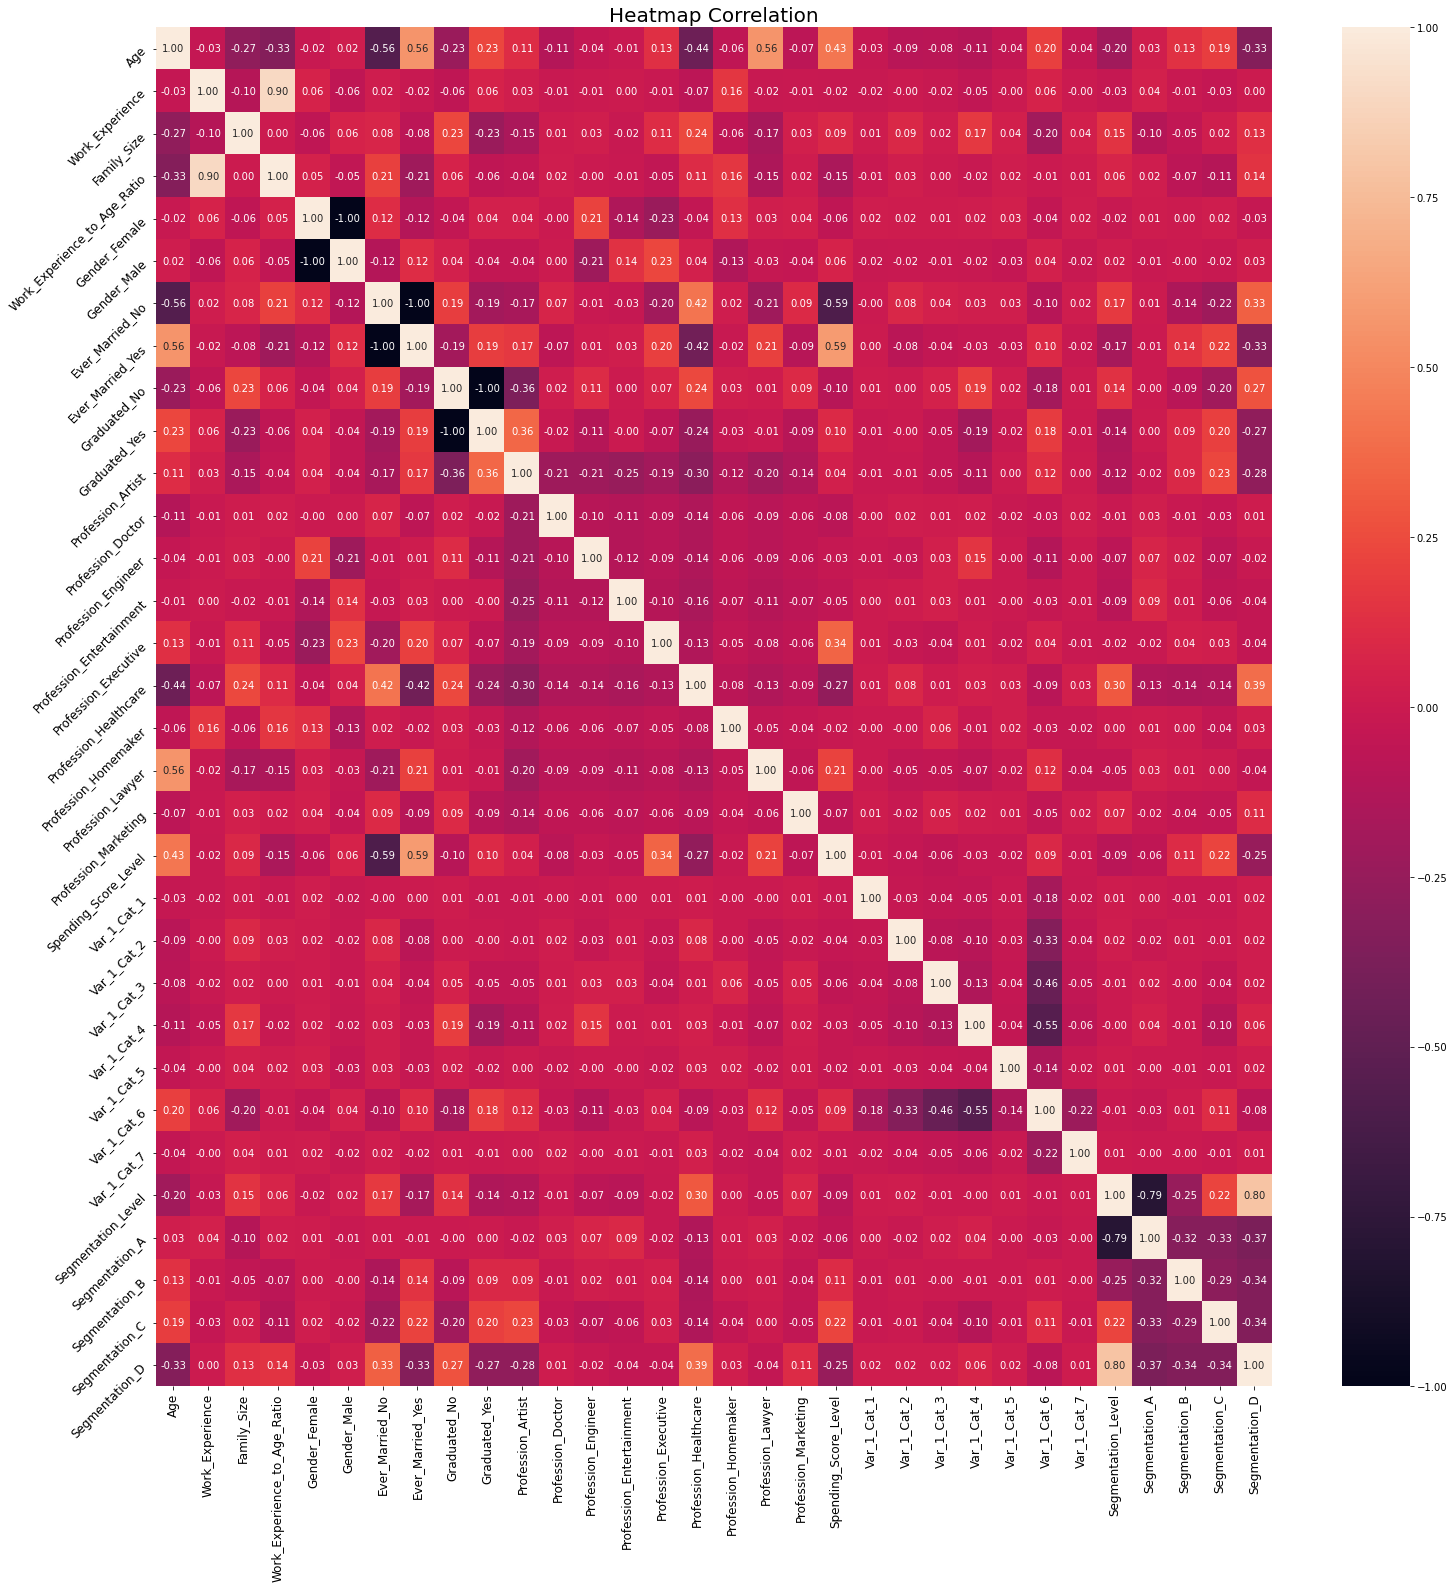

In [12]:
#Plotting Bar Charts, also considering all numerical to categorical variables created at the step before

fig, axarr = plt.subplots(4, 3, figsize=(30, 18))
sns.countplot(x="Gender", hue = "Segmentation", data = auto_ds, ax=axarr[0][0])
sns.countplot(x="Ever_Married", hue = "Segmentation", data = auto_ds, ax=axarr[0][1])
sns.countplot(x="Graduated", hue = "Segmentation", data = auto_ds, ax=axarr[0][2])
sns.countplot(x="Profession", hue = "Segmentation", data = auto_ds, ax=axarr[1][0])
sns.countplot(x="Spending_Score", hue = "Segmentation", data = auto_ds, ax=axarr[1][1])
sns.countplot(x="Var_1", hue = "Segmentation", data = auto_ds, ax=axarr[1][2])
sns.countplot(x="Age_Range", hue = "Segmentation", data = auto_ds, ax=axarr[2][0])
sns.countplot(x="Work_Experience_Range", hue = "Segmentation", data = auto_ds, ax=axarr[2][1])
sns.countplot(x="Family_Size_Range", hue = "Segmentation", data = auto_ds, ax=axarr[2][2])
sns.countplot(x="Work_Experience_to_Age_Ratio_Range", hue = "Segmentation", data = auto_ds, ax=axarr[3][0])

#Deleting original categorical columns

auto_ds.drop(["Segmentation", "Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Age_Range",
              "Work_Experience_Range", "Family_Size_Range", "Work_Experience_to_Age_Ratio_Range"], axis=1, inplace=True)

#Plotting a Heatmap

fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(auto_ds.corr(), annot=True, fmt=",.2f")
plt.title("Heatmap Correlation", fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

#Plotting a Pairplot

# sns.pairplot(auto_ds)

Feature:Age, Score:0.0194
Feature:Work_Experience, Score:0.0030
Feature:Family_Size, Score:0.0039
Feature:Work_Experience_to_Age_Ratio, Score:0.0047
Feature:Gender_Female, Score:0.0006
Feature:Gender_Male, Score:0.0006
Feature:Ever_Married_No, Score:0.0050
Feature:Ever_Married_Yes, Score:0.0080
Feature:Graduated_No, Score:0.0036
Feature:Graduated_Yes, Score:0.0035
Feature:Profession_Artist, Score:0.0072
Feature:Profession_Doctor, Score:0.0004
Feature:Profession_Engineer, Score:0.0005
Feature:Profession_Entertainment, Score:0.0007
Feature:Profession_Executive, Score:0.0005
Feature:Profession_Healthcare, Score:0.0125
Feature:Profession_Homemaker, Score:0.0002
Feature:Profession_Lawyer, Score:0.0003
Feature:Profession_Marketing, Score:0.0008
Feature:Spending_Score_Level, Score:0.0092
Feature:Var_1_Cat_1, Score:0.0001
Feature:Var_1_Cat_2, Score:0.0004
Feature:Var_1_Cat_3, Score:0.0004
Feature:Var_1_Cat_4, Score:0.0009
Feature:Var_1_Cat_5, Score:0.0001
Feature:Var_1_Cat_6, Score:0.0008
Feat

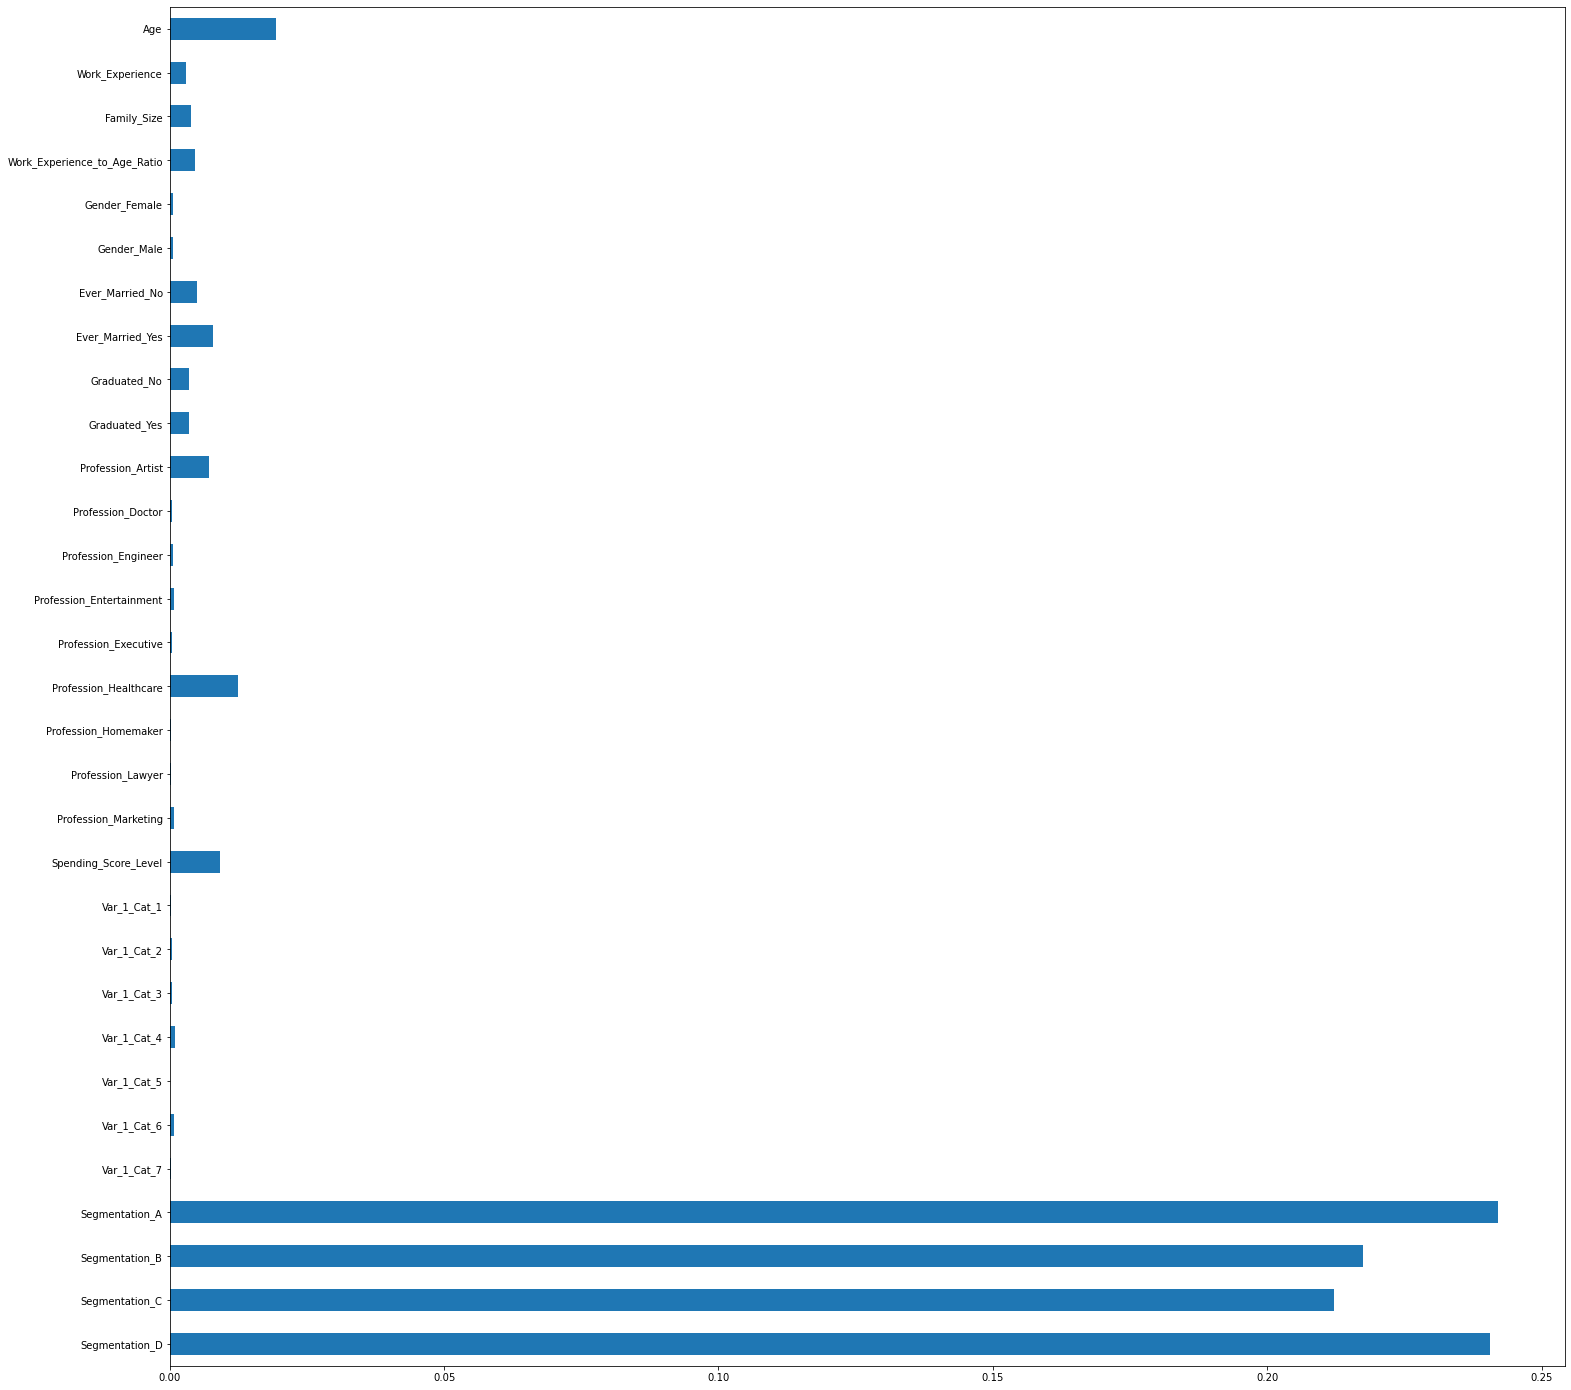

In [13]:
#Plotting a Feature Importance

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
#Defining Xs and y
X = auto_ds.drop(["Segmentation_Level"], axis=1)
y = auto_ds["Segmentation_Level"]
#Defining the model
model = RandomForestClassifier().fit(X, y)
#Getting importance
importance = model.feature_importances_
#Summarizing feature importance
for i,v in enumerate(importance):
    print("Feature:{0:}, Score:{1:,.4f}".format(X.columns[i], v))
#Plotting feature importance
pd.Series(model.feature_importances_[::-1], index=X.columns[::-1]).plot(kind="barh", figsize=(25,25))

# 8. Data Modelling

In [14]:
#Defining Xs and y

X = auto_ds[["Age", "Family_Size", "Profession_Healthcare", "Profession_Entertainment", "Profession_Artist", "Ever_Married_Yes",
             "Graduated_No", "Spending_Score_Level"]]
y = auto_ds["Segmentation_Level"]
y_dl = Segmentation_encoding_dl #for the DL model

#Scaling all features

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

#Setting train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_scaled, y_dl, random_state=0) #for the DL model

# 9. Machine Learning Algorithms Implementation & Assessment

# 9.1 Logistic Regression

Testing degrees:
Train: Degree:1, Accuracy:0.449, Precision:0.430, Recall:0.449, F1:0.425
Test : Degree:1, Accuracy:0.457, Precision:0.446, Recall:0.457, F1:0.436
Train: Degree:2, Accuracy:0.479, Precision:0.473, Recall:0.479, F1:0.470
Test : Degree:2, Accuracy:0.471, Precision:0.465, Recall:0.471, F1:0.461
Train: Degree:3, Accuracy:0.491, Precision:0.484, Recall:0.491, F1:0.485
Test : Degree:3, Accuracy:0.472, Precision:0.463, Recall:0.472, F1:0.464

Linear Regression Intercept: [ 0.74566382 -0.72059923 -1.15691662  1.13185203]
Linear Regression Coefficients: [[ 2.79543955e-03 -1.27642573e+00 -1.09246238e+00 -2.94347705e-01
   3.42561187e-01  5.07925825e-02  1.12260430e-01 -1.29335453e-02
  -6.45375732e-01  1.35809639e+00  5.46076216e-01  7.81656976e-01
   1.30771766e-01 -3.08661919e-01 -7.78334961e-01  1.79902333e-01
   1.19508283e-01  4.33805172e-01  1.21151964e-01 -8.63983036e-01
   3.38783730e-01  4.00340206e-01 -1.97710866e-01 -1.76866962e-01
  -2.94347705e-01  0.00000000e+00  0.

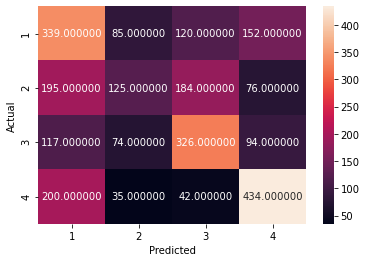

In [15]:
#Creating a Logistic Regression model and checking its Metrics

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

#Trying different polynomial degrees
degrees = [1, 2, 3]
print("Testing degrees:")
for a in degrees:
    poly = PolynomialFeatures(degree=a)
    X_train_degree = poly.fit_transform(X_train)
    X_test_degree = poly.fit_transform(X_test)
    model_lr = linear_model.LogisticRegression(max_iter=1000000000).fit(X_train_degree, y_train.values.ravel())
    y_preds_train = model_lr.predict(X_train_degree)
    y_preds_test = model_lr.predict(X_test_degree)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best polynomial degree
chosen_degree = 2
poly = PolynomialFeatures(degree=chosen_degree)

#Working on X_train & X_test in the polynomial chosen degree
X_train_degree = poly.fit_transform(X_train)
X_test_degree = poly.fit_transform(X_test)

#Fitting to the model
model_lr = linear_model.LogisticRegression(max_iter=1000000000).fit(X_train_degree, y_train.values.ravel())
print(f"Linear Regression Intercept: {model_lr.intercept_}")
print(f"Linear Regression Coefficients: {model_lr.coef_}, \n")

#Getting the predictions & Metrics
y_preds_train = model_lr.predict(X_train_degree)
y_preds_test = model_lr.predict(X_test_degree)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen degree:")
print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
X_degree = poly.fit_transform(X_scaled)
y_preds_all = model_lr.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_lr.xlsx")

# 9.2 Logistic Regression CV

In [16]:
# #Creating a Logistic Regression CV model and checking its Metrics (for this exercise we´re skipping this algorithm due to the execution time since we´d need a more powerful machine)

# #Trying different polynomial degrees
# degrees = [1, 2]
# print("Testing degrees:")
# for a in degrees:
#     poly = PolynomialFeatures(degree=a)
#     X_train_degree = poly.fit_transform(X_train)
#     X_test_degree = poly.fit_transform(X_test)
#     model_lr_cv = linear_model.LogisticRegressionCV(max_iter=1000000000).fit(X_train_degree, y_train)
#     y_preds_train = model_lr_cv.predict(X_train_degree)
#     y_preds_test = model_lr_cv.predict(X_test_degree)
#     accuracy_train = accuracy_score(y_train, y_preds_train)
#     accuracy_test = accuracy_score(y_test, y_preds_test)
#     precision_train = precision_score(y_train, y_preds_train, average="weighted")
#     precision_test = precision_score(y_test, y_preds_test, average="weighted")
#     recall_train = recall_score(y_train, y_preds_train, average="weighted")
#     recall_test = recall_score(y_test, y_preds_test, average="weighted")
#     f1_train = f1_score(y_train, y_preds_train, average="weighted")
#     f1_test = f1_score(y_test, y_preds_test, average="weighted")
#     print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
#     print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
# print("")

# #Choosing the best polynomial degree
# chosen_degree = 2
# poly = PolynomialFeatures(degree=chosen_degree)

# #Working on X_train & X_test in the polynomial chosen degree
# X_train_degree = poly.fit_transform(X_train)
# X_test_degree = poly.fit_transform(X_test)

# #Fitting to the model
# model_lr_cv = linear_model.LogisticRegressionCV(1000000000).fit(X_train_degree, y_train)
# print(f"Linear Regression Intercept: {model_lr_cv.intercept_}")
# print(f"Linear Regression Coefficients: {model_lr_cv.coef_}, \n")

# #Getting the predictions & Metrics
# y_preds_train = model_lr_cv.predict(X_train_degree)
# y_preds_test = model_lr_cv.predict(X_test_degree)
# accuracy_train = accuracy_score(y_train, y_preds_train)
# accuracy_test = accuracy_score(y_test, y_preds_test)
# precision_train = precision_score(y_train, y_preds_train, average="weighted")
# precision_test = precision_score(y_test, y_preds_test, average="weighted")
# recall_train = recall_score(y_train, y_preds_train, average="weighted")
# recall_test = recall_score(y_test, y_preds_test, average="weighted")
# f1_train = f1_score(y_train, y_preds_train, average="weighted")
# f1_test = f1_score(y_test, y_preds_test, average="weighted")
# print("Chosen degree:")
# print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_train, precision_train, recall_train, f1_train))
# print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
# print("\nConfusion matrix:")
# confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
# print(f"{confusion_matrix}, \n")
# sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# #Visualizing y_pred in the dataset
# X_degree = poly.fit_transform(X)
# y_preds_all = model_lr_cv.predict(X_scaled)
# auto_ds["Segmentation_Level_predicted"] = y_preds_all
# auto_ds.to_excel("model_lr_cv.xlsx")

# 9.3 SVM

Train: Accuracy:0.473, Precision:0.468, Recall:0.473, F1:0.468
Test : Accuracy:0.464, Precision:0.455, Recall:0.464, F1:0.455

Confusion matrix:
Predicted    1    2    3    4
Actual                       
1          324  105  109  158
2          197  131  173   79
3          107   99  310   95
4          188   31   52  440, 



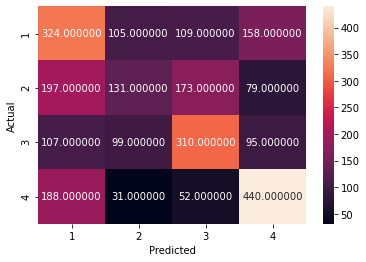

In [17]:
#Creating a SVM model and checking its Metrics

from sklearn import svm

#Fitting to the model
model_svm = svm.SVC().fit(X_train, y_train)

#Getting the predictions & Metrics
y_preds_train = model_svm.predict(X_train)
y_preds_test = model_svm.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_train, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_svm.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_svm.xlsx")

# 9.4 Naive Bayes

Train: Accuracy:0.432, Precision:0.422, Recall:0.432, F1:0.381
Test : Accuracy:0.436, Precision:0.477, Recall:0.436, F1:0.383

Confusion matrix:
Predicted    1  2    3    4
Actual                     
1          284  0  237  175
2          211  3  281   85
3          126  1  389   95
4          164  1   89  457, 



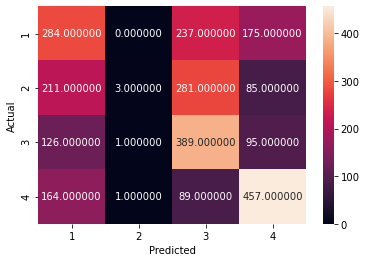

In [18]:
#Creating a Naive Bayes model and checking its Metrics

from sklearn import naive_bayes

#Fitting to the model
model_nb = naive_bayes.MultinomialNB().fit(X_train, y_train)

#Getting the predictions & Metrics
y_preds_train = model_nb.predict(X_train)
y_preds_test = model_nb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_train, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_nb.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_nb.xlsx")

# 9.5 KNN

Testing neighbors:
Train: Neighbors:1, Accuracy:0.632, Precision:0.633, Recall:0.632, F1:0.632
Test : Neighbors:1, Accuracy:0.360, Precision:0.358, Recall:0.360, F1:0.359
Train: Neighbors:2, Accuracy:0.554, Precision:0.618, Recall:0.554, F1:0.547
Test : Neighbors:2, Accuracy:0.357, Precision:0.410, Recall:0.357, F1:0.358
Train: Neighbors:3, Accuracy:0.578, Precision:0.603, Recall:0.578, F1:0.579
Test : Neighbors:3, Accuracy:0.401, Precision:0.415, Recall:0.401, F1:0.400
Train: Neighbors:4, Accuracy:0.579, Precision:0.588, Recall:0.579, F1:0.580
Test : Neighbors:4, Accuracy:0.402, Precision:0.410, Recall:0.402, F1:0.403
Train: Neighbors:5, Accuracy:0.565, Precision:0.576, Recall:0.565, F1:0.566
Test : Neighbors:5, Accuracy:0.414, Precision:0.424, Recall:0.414, F1:0.416
Train: Neighbors:6, Accuracy:0.561, Precision:0.570, Recall:0.561, F1:0.562
Test : Neighbors:6, Accuracy:0.424, Precision:0.430, Recall:0.424, F1:0.424
Train: Neighbors:7, Accuracy:0.555, Precision:0.563, Recall:0.555, F1

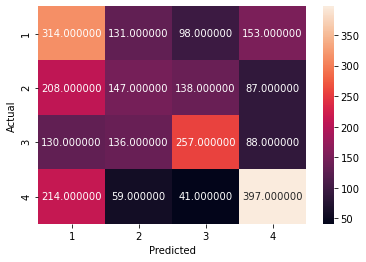

In [19]:
#Creating a KNN model and checking its Metrics

from sklearn import neighbors

#Trying different neighbors
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
print("Testing neighbors:")
for a in n_neighbors:
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=a).fit(X_train, y_train)
    y_preds_train = model_knn.predict(X_train)
    y_preds_test = model_knn.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best neighbor
chosen_neighbor = 10
model_knn = neighbors.KNeighborsClassifier(n_neighbors=chosen_neighbor).fit(X_train, y_train)
y_preds_train = model_knn.predict(X_train)
y_preds_test = model_knn.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen neighbors:")
print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_knn.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_knn.xlsx")

# 9.6 Random Forest

Testing depths:


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train: Depth:1, Accuracy:0.444, Precision:0.342, Recall:0.444, F1:0.385
Test : Depth:1, Accuracy:0.443, Precision:0.343, Recall:0.443, F1:0.386
Train: Depth:2, Accuracy:0.463, Precision:0.441, Recall:0.463, F1:0.435
Test : Depth:2, Accuracy:0.458, Precision:0.433, Recall:0.458, F1:0.430
Train: Depth:3, Accuracy:0.471, Precision:0.455, Recall:0.471, F1:0.451
Test : Depth:3, Accuracy:0.462, Precision:0.443, Recall:0.462, F1:0.441
Train: Depth:4, Accuracy:0.482, Precision:0.472, Recall:0.482, F1:0.470
Test : Depth:4, Accuracy:0.462, Precision:0.444, Recall:0.462, F1:0.447
Train: Depth:5, Accuracy:0.488, Precision:0.480, Recall:0.488, F1:0.479
Test : Depth:5, Accuracy:0.470, Precision:0.456, Recall:0.470, F1:0.458
Train: Depth:6, Accuracy:0.499, Precision:0.493, Recall:0.499, F1:0.491
Test : Depth:6, Accuracy:0.472, Precision:0.458, Recall:0.472, F1:0.460
Train: Depth:7, Accuracy:0.514, Precision:0.508, Recall:0.514, F1:0.506
Test : Depth:7, Accuracy:0.473, Precision:0.461, Recall:0.473, F

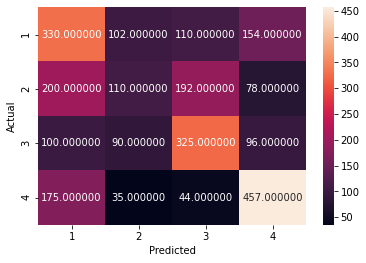

In [20]:
#Creating a Random Forest model and checking its Metrics

from sklearn import ensemble

#Trying different depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_rf = ensemble.RandomForestClassifier(max_depth=a, random_state=0).fit(X_train, y_train)
    y_preds_train = model_rf.predict(X_train)
    y_preds_test = model_rf.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best depth
chosen_depth = 5
model_rf = ensemble.RandomForestClassifier(max_depth=chosen_depth, random_state=0).fit(X_train, y_train)
y_preds_train = model_rf.predict(X_train)
y_preds_test = model_rf.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen depth:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_rf.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_rf.xlsx")

# 9.7 XGBoost

Testing depths:
Train: Depth:1, Accuracy:0.481, Precision:0.473, Recall:0.481, F1:0.471
Test : Depth:1, Accuracy:0.473, Precision:0.462, Recall:0.473, F1:0.462
Train: Depth:2, Accuracy:0.500, Precision:0.493, Recall:0.500, F1:0.494
Test : Depth:2, Accuracy:0.478, Precision:0.471, Recall:0.478, F1:0.472
Train: Depth:3, Accuracy:0.515, Precision:0.509, Recall:0.515, F1:0.510
Test : Depth:3, Accuracy:0.469, Precision:0.461, Recall:0.469, F1:0.463
Train: Depth:4, Accuracy:0.547, Precision:0.541, Recall:0.547, F1:0.541
Test : Depth:4, Accuracy:0.472, Precision:0.463, Recall:0.472, F1:0.465
Train: Depth:5, Accuracy:0.572, Precision:0.567, Recall:0.572, F1:0.568
Test : Depth:5, Accuracy:0.470, Precision:0.462, Recall:0.470, F1:0.464
Train: Depth:6, Accuracy:0.604, Precision:0.601, Recall:0.604, F1:0.601
Test : Depth:6, Accuracy:0.459, Precision:0.451, Recall:0.459, F1:0.453
Train: Depth:7, Accuracy:0.638, Precision:0.635, Recall:0.638, F1:0.636
Test : Depth:7, Accuracy:0.439, Precision:0.433,

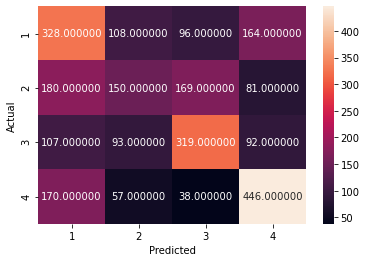

In [21]:
#Creating a XGBoost model and checking its Metrics

from xgboost import XGBClassifier

#Trying different depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_xgbc = XGBClassifier(max_depth=a, objective="multi:softmax", num_class=4, random_state=0).fit(X_train, y_train)
    y_preds_train = model_xgbc.predict(X_train)
    y_preds_test = model_xgbc.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best depth
chosen_depth = 2
model_xgbc = XGBClassifier(max_depth=chosen_depth, objective="multi:softmax", num_class=4, random_state=0).fit(X_train, y_train)
y_preds_train = model_xgbc.predict(X_train)
y_preds_test = model_xgbc.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen depth:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_xgbc.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_xgbc.xlsx")

# 9.8 Deep Learning

In [22]:
#Creating a Deep Learning model and checking its Metrics

from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
pd.options.mode.chained_assignment = None

#Creating a model
model_dl = Sequential()

#Input and First Hidden Layer
model_dl.add(Dense(units=256, activation="relu", input_dim=X_train.shape[1]))

#Output Layer
model_dl.add(Dense(units=4, activation="softmax"))

#Compiling the neural network
model_dl.compile(optimizer="Adam", loss="CategoricalCrossentropy", metrics=["CategoricalAccuracy"])

#Fitting to the model
model_dl.fit(X_train_dl, y_train_dl, epochs=100)

#Getting the predictions & Metrics
#Training set
y_preds_train = model_dl.predict(X_train_dl)
y_preds_train = pd.DataFrame(y_preds_train)
#Creating y_preds_all columns with the probabilities in the original dataset
auto_ds_train = pd.DataFrame()
auto_ds_train["Segmentation_A_predicted_train"] = y_preds_train[0]
auto_ds_train["Segmentation_B_predicted_train"] = y_preds_train[1]
auto_ds_train["Segmentation_C_predicted_train"] = y_preds_train[2]
auto_ds_train["Segmentation_D_predicted_train"] = y_preds_train[3]
#Finding the highest probability per row
max_prob_per_row_train_ds = auto_ds_train[["Segmentation_A_predicted_train", "Segmentation_B_predicted_train", "Segmentation_C_predicted_train", "Segmentation_D_predicted_train"]].idxmax(axis=1)
max_prob_per_row_train_ds = pd.DataFrame(max_prob_per_row_train_ds)
max_prob_per_row_train_ds = max_prob_per_row_train_ds.reset_index(drop=True)
auto_ds_train["Segmentation_predicted_train"] = max_prob_per_row_train_ds
#Setting ones and zeros according to the probabilities
for i in range(0, len(max_prob_per_row_train_ds)):
    if  max_prob_per_row_train_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_A_predicted_train":
        auto_ds_train["Segmentation_A_predicted_train"][i] = 1
        auto_ds_train["Segmentation_B_predicted_train"][i] = 0
        auto_ds_train["Segmentation_C_predicted_train"][i] = 0
        auto_ds_train["Segmentation_D_predicted_train"][i] = 0    
    elif max_prob_per_row_train_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_B_predicted_train":
        auto_ds_train["Segmentation_A_predicted_train"][i] = 0
        auto_ds_train["Segmentation_B_predicted_train"][i] = 1
        auto_ds_train["Segmentation_C_predicted_train"][i] = 0
        auto_ds_train["Segmentation_D_predicted_train"][i] = 0
    elif max_prob_per_row_train_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_C_predicted_train":
        auto_ds_train["Segmentation_A_predicted_train"][i] = 0
        auto_ds_train["Segmentation_B_predicted_train"][i] = 0
        auto_ds_train["Segmentation_C_predicted_train"][i] = 1
        auto_ds_train["Segmentation_D_predicted_train"][i] = 0
    elif max_prob_per_row_train_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_D_predicted_train":
        auto_ds_train["Segmentation_A_predicted_train"][i] = 0
        auto_ds_train["Segmentation_B_predicted_train"][i] = 0
        auto_ds_train["Segmentation_C_predicted_train"][i] = 0
        auto_ds_train["Segmentation_D_predicted_train"][i] = 1
    else:
        auto_ds_train["Segmentation_A_predicted_train"][i] = 0
        auto_ds_train["Segmentation_B_predicted_train"][i] = 0
        auto_ds_train["Segmentation_C_predicted_train"][i] = 0
        auto_ds_train["Segmentation_D_predicted_train"][i] = 0
#Creating for the DL model the response variable through the concatenation of the created dummy columns, forming an array
y_preds_train_encoded = np.asarray(auto_ds_train[["Segmentation_A_predicted_train", "Segmentation_B_predicted_train", "Segmentation_C_predicted_train", "Segmentation_D_predicted_train"]])

#Test set
y_preds_test = model_dl.predict(X_test_dl)
y_preds_test = pd.DataFrame(y_preds_test)
#Creating y_preds_all columns with the probabilities in the original dataset
auto_ds_test = pd.DataFrame()
auto_ds_test["Segmentation_A_predicted_test"] = y_preds_test[0]
auto_ds_test["Segmentation_B_predicted_test"] = y_preds_test[1]
auto_ds_test["Segmentation_C_predicted_test"] = y_preds_test[2]
auto_ds_test["Segmentation_D_predicted_test"] = y_preds_test[3]
#Finding the highest probability per row
max_prob_per_row_test_ds = auto_ds_test[["Segmentation_A_predicted_test", "Segmentation_B_predicted_test", "Segmentation_C_predicted_test", "Segmentation_D_predicted_test"]].idxmax(axis=1)
max_prob_per_row_test_ds = pd.DataFrame(max_prob_per_row_test_ds)
max_prob_per_row_test_ds = max_prob_per_row_test_ds.reset_index(drop=True)
auto_ds_test["Segmentation_predicted_test"] = max_prob_per_row_test_ds
#Setting ones and zeros according to the probabilities
for i in range(0, len(max_prob_per_row_test_ds)):
    if  max_prob_per_row_test_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_A_predicted_test":
        auto_ds_test["Segmentation_A_predicted_test"][i] = 1
        auto_ds_test["Segmentation_B_predicted_test"][i] = 0
        auto_ds_test["Segmentation_C_predicted_test"][i] = 0
        auto_ds_test["Segmentation_D_predicted_test"][i] = 0    
    elif max_prob_per_row_test_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_B_predicted_test":
        auto_ds_test["Segmentation_A_predicted_test"][i] = 0
        auto_ds_test["Segmentation_B_predicted_test"][i] = 1
        auto_ds_test["Segmentation_C_predicted_test"][i] = 0
        auto_ds_test["Segmentation_D_predicted_test"][i] = 0
    elif max_prob_per_row_test_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_C_predicted_test":
        auto_ds_test["Segmentation_A_predicted_test"][i] = 0
        auto_ds_test["Segmentation_B_predicted_test"][i] = 0
        auto_ds_test["Segmentation_C_predicted_test"][i] = 1
        auto_ds_test["Segmentation_D_predicted_test"][i] = 0
    elif max_prob_per_row_test_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_D_predicted_test":
        auto_ds_test["Segmentation_A_predicted_test"][i] = 0
        auto_ds_test["Segmentation_B_predicted_test"][i] = 0
        auto_ds_test["Segmentation_C_predicted_test"][i] = 0
        auto_ds_test["Segmentation_D_predicted_test"][i] = 1
    else:
        auto_ds_test["Segmentation_A_predicted_test"][i] = 0
        auto_ds_test["Segmentation_B_predicted_test"][i] = 0
        auto_ds_test["Segmentation_C_predicted_test"][i] = 0
        auto_ds_test["Segmentation_D_predicted_test"][i] = 0
#Creating for the DL model the response variable through the concatenation of the created dummy columns, forming an array
y_preds_test_encoded = np.asarray(auto_ds_test[["Segmentation_A_predicted_test", "Segmentation_B_predicted_test", "Segmentation_C_predicted_test", "Segmentation_D_predicted_test"]])

accuracy_train = accuracy_score(y_train_dl, y_preds_train_encoded)
accuracy_test = accuracy_score(y_test_dl, y_preds_test_encoded)
precision_train = precision_score(y_train_dl, y_preds_train_encoded, average="weighted")
precision_test = precision_score(y_test_dl, y_preds_test_encoded, average="weighted")
recall_train = recall_score(y_train_dl, y_preds_train_encoded, average="weighted")
recall_test = recall_score(y_test_dl, y_preds_test_encoded, average="weighted")
f1_train = f1_score(y_train_dl, y_preds_train_encoded, average="weighted")
f1_test = f1_score(y_test_dl, y_preds_test_encoded, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_train, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
# print("\nConfusion matrix:")
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test_dl, y_preds_test_encoded)
# print(f"{confusion_matrix}, \n")
# sns.heatmap(confusion_matrix, annot=True, fmt='.0f')

#Visualizing y_pred in the dataset
y_preds_all = model_dl.predict(X_scaled)
y_preds_all = pd.DataFrame(y_preds_all)
#Creating y_preds_all columns with the probabilities in the original dataset
auto_ds["Segmentation_A_predicted"] = y_preds_all[0]
auto_ds["Segmentation_B_predicted"] = y_preds_all[1]
auto_ds["Segmentation_C_predicted"] = y_preds_all[2]
auto_ds["Segmentation_D_predicted"] = y_preds_all[3]
#Finding the highest probability per row
max_prob_per_row_all_ds = auto_ds[["Segmentation_A_predicted", "Segmentation_B_predicted", "Segmentation_C_predicted", "Segmentation_D_predicted"]].idxmax(axis=1)
max_prob_per_row_all_ds = pd.DataFrame(max_prob_per_row_all_ds)
max_prob_per_row_all_ds = max_prob_per_row_all_ds.reset_index(drop=True)
auto_ds["Segmentation_predicted"] = max_prob_per_row_all_ds
#Setting ones and zeros according to the probabilities
for i in range(0, len(max_prob_per_row_all_ds)):
    if  max_prob_per_row_all_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_A_predicted":
        auto_ds["Segmentation_A_predicted"][i] = 1
        auto_ds["Segmentation_B_predicted"][i] = 0
        auto_ds["Segmentation_C_predicted"][i] = 0
        auto_ds["Segmentation_D_predicted"][i] = 0    
    elif max_prob_per_row_all_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_B_predicted":
        auto_ds["Segmentation_A_predicted"][i] = 0
        auto_ds["Segmentation_B_predicted"][i] = 1
        auto_ds["Segmentation_C_predicted"][i] = 0
        auto_ds["Segmentation_D_predicted"][i] = 0
    elif max_prob_per_row_all_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_C_predicted":
        auto_ds["Segmentation_A_predicted"][i] = 0
        auto_ds["Segmentation_B_predicted"][i] = 0
        auto_ds["Segmentation_C_predicted"][i] = 1
        auto_ds["Segmentation_D_predicted"][i] = 0
    elif max_prob_per_row_all_ds.iloc[[i], [0]].T.squeeze() == "Segmentation_D_predicted":
        auto_ds["Segmentation_A_predicted"][i] = 0
        auto_ds["Segmentation_B_predicted"][i] = 0
        auto_ds["Segmentation_C_predicted"][i] = 0
        auto_ds["Segmentation_D_predicted"][i] = 1
    else:
        auto_ds["Segmentation_A_predicted"][i] = 0
        auto_ds["Segmentation_B_predicted"][i] = 0
        auto_ds["Segmentation_C_predicted"][i] = 0
        auto_ds["Segmentation_D_predicted"][i] = 0
auto_ds.to_excel("model_dl.xlsx")

Epoch 1/100
244/244 [==============================] - 0s 1ms/step - loss: 1.2452 - categorical_accuracy: 0.4292
Epoch 2/100
244/244 [==============================] - 0s 1ms/step - loss: 1.2108 - categorical_accuracy: 0.4484
Epoch 3/100
244/244 [==============================] - 0s 1ms/step - loss: 1.2047 - categorical_accuracy: 0.4561
Epoch 4/100
244/244 [==============================] - 0s 1ms/step - loss: 1.1993 - categorical_accuracy: 0.4588
Epoch 5/100
244/244 [==============================] - 0s 1ms/step - loss: 1.1953 - categorical_accuracy: 0.4647
Epoch 6/100
244/244 [==============================] - 0s 1ms/step - loss: 1.1914 - categorical_accuracy: 0.4625
Epoch 7/100
244/244 [==============================] - 0s 1ms/step - loss: 1.1896 - categorical_accuracy: 0.4643
Epoch 8/100
244/244 [==============================] - 0s 1ms/step - loss: 1.1865 - categorical_accuracy: 0.4682
Epoch 9/100
244/244 [==============================] - 0s 1ms/step - loss: 1.1843 - categorical_

# 10. Model Deployment

In [23]:
#Entering Xs

# age_input = float(input("Enter the client´s age: "))
# fam_input = int(input("Enter the client´s family size: "))
# prof_hc_input = str(input("Is the client´s profession Healthcare (Yes/No)? "))
# if prof_hc_input == "Yes":
#     prof_hc_input = 1
# else:
#     prof_hc_input = 0
# prof_e_input = str(input("Is the client´s profession Entertainment (Yes/No)? "))
# if prof_e_input == "Yes":
#     prof_e_input = 1
# else:
#     prof_e_input = 0
# prof_a_input = str(input("Is the client´s profession Artist (Yes/No)? "))
# if prof_a_input == "Yes":
#     prof_a_input = 1
# else:
#     prof_a_input = 0
# married_input = str(input("Has the client ever married (Yes/No)? "))
# if married_input == "Yes":
#     married_input = 1
# else:
#     married_input = 0
# grad_n_input = str(input("Is the client graduated (Yes/No)? "))
# if grad_n_input == "Yes":
#     grad_n_input = 0
# else:
#     grad_n_input = 1
# spend_input = int(input("Enter the client´s score level: "))

#Defining Xs
# X_mod_dep = pd.DataFrame({"Age":[age_input], "Family_Size":[fam_input], "Profession_Healthcare":[prof_hc_input], 
#                           "Profession_Entertainment":[prof_e_input], "Profession_Artist":[prof_a_input], 
#                           "Ever_Married_Yes":[married_input], "Graduated_No":[grad_n_input], "Spending_Score_Level":[spend_input]})

#Choosing an specific client for testing:
X_mod_dep = pd.DataFrame({"Age":[79], "Family_Size":[1], "Profession_Healthcare":[0], 
                          "Profession_Entertainment":[0], "Profession_Artist":[1], 
                          "Ever_Married_Yes":[1], "Graduated_No":[0], "Spending_Score_Level":[3]})

#Appending X_mod_dep to original X dataframe, so we can scale it all together next

X_with_X_mode_dep = X.append(X_mod_dep)
X_with_X_mode_dep = X_with_X_mode_dep.reset_index(drop=True)

#Scaling all features

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X_with_X_mode_dep)
X_scaled = pd.DataFrame(X_scaled)

#Recovering X_mod_dep row in dataframe after scaling

X_mod_dep = X_scaled.tail(1)

#Predicting results

prediction = model_xgbc.predict(X_mod_dep)
if prediction == 1:
    prediction_answer = "A"
if prediction == 2:
    prediction_answer = "B"
if prediction == 3:
    prediction_answer = "C"
if prediction == 4:
    prediction_answer = "D"

print("")
print(f"This client´s predicted Segmentation is: {prediction_answer}.")


This client´s predicted Segmentation is: C.


# 11. Conclusions

IF YOU LIKE IT OR IF IT HELPS YOU SOMEHOW, COULD YOU PLEASE UPVOTE? THANK YOU VERY MUCH!!!

In this project we went through all the process from defining the business objective, collecting data, exploring features and distributions, treating data, understanding correlations, selecting relevant features, data modelling and presenting 7 different algorithms with metrics to select the best to predict the Customer Segmentation, what will help the business adopt the best marketing strategies to each of them and bring more market share and revenue to the company. The chosen model was XGBoost since it´s the most accurate, although it has limitations and doesn’t present a high accuracy. We could reach a more robust model having more data about customers, it´s something to explore and go deeper in the organization with the business team and the data engineer in order to explore if more relevant features are available.